# ML in Cybersecurity: Project I

## Team
  * **Team name**: *GoodFellows*
  * **Members**:  *fill this in. format:  Md Abdul Kadir (s8mdkadi@stud.uni-saarland.de), Hasan Md Tusfiqur Alam (s8haalam@stud.uni-saarland.de), Chirage Bhuvaneshwara (s8chbhuv@stud.uni-saarland.de) (Has already completed the assignments in MLCySec WS18/19 and is required to submit only Project 2)


## Logistics
  * **Due date**: 13th November 2018, 23:59:59 (email the completed notebook to mlcysec_ws1920_staff@lists.cispa.saarland)
  * Complete this in **teams of 3**
  * Feel free to use the course [mailing list](https://lists.cispa.saarland/listinfo/mlcysec_ws1920_stud) to find group members.
  
## Timeline
  * 31-Oct-2018: Project 1 hand-out
  * **13-Nov-2018** (23:59:59): Email completed notebook to respective TAs
  * 21-Nov-2018: Project 1 discussion and summary
  
  
## About this Project
In this project, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this project are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this project will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your project report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [5]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.
import torch
import sklearn
import torchvision
import random
from sklearn.svm import SVC
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.decomposition import PCA

# We only support sklearn and pytorch.

# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)
torch.manual_seed(73)

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [49]:
def identity_func(foo):
    return foo

def PIL_to_np(image):
    return np.array(image)

# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('predicted label: {0}'. format(y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint trainval and test splits!

In [50]:
# loading dataset
dataset_dir = 'data/mnist'
training_data = torchvision.datasets.MNIST(dataset_dir,train=True, transform=PIL_to_np, 
                                     target_transform=None, download=True)
test_data = torchvision.datasets.MNIST(dataset_dir,train=False, transform=PIL_to_np, 
                                     target_transform=None, download=True)

# Loadin training data in to numpy array

x_trainval_3d = np.array([training_data[i][0] for i in range(len(training_data))])
x_trainval = flatten_input_pixels(x_trainval_3d)
y_trainval = np.array([training_data[i][1] for i in range(len(training_data))])

# Loading test data into numpy array

x_test_3d = np.array([test_data[i][0] for i in range(len(test_data))])
x_test =  flatten_input_pixels(x_test_3d)
y_test = np.array([test_data[i][1] for i in range(len(test_data))])


print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
x_trainval = x_trainval[:int(len(x_trainval)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]
# Use the debuging idea for 3d input
x_trainval_3d = x_trainval_3d[:int(len(x_trainval_3d)*DEBUG_FRAC)]




x_trainval.shape = (60000, 784),  y_trainval.shape = (60000,)
x_test.shape = (10000, 784),  y_test.shape = (10000,)


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

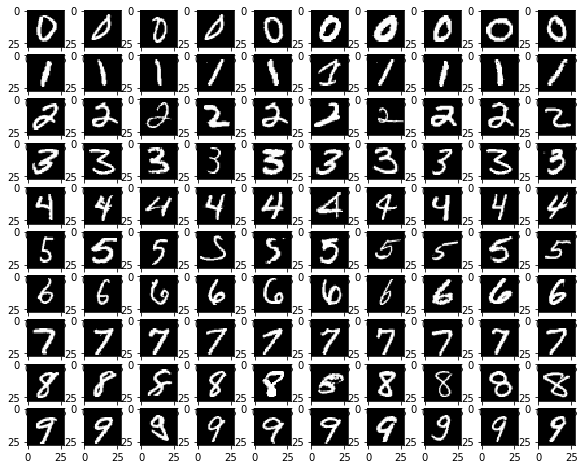

In [51]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig,ax = plt.subplots(nrows = rows, ncols = cols)
for i in range(10):
    img_index =list(np.where(y_trainval == i))
    rand_ten_images = random.choices(img_index[0], k=10)
    j = 0
    for idx in rand_ten_images:
        img = np.reshape(x_trainval[idx], (28, 28))
        ax[i, j].imshow(img)
        j += 1

plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *fill-this-in* (25 points)

**Short description **: *fill this in*

### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here

In [39]:
c_values = [0.05, 0.1, 0.5, 1]
gamma_values = [0.005, 0.01, 0.05, 0.1]
kernel_values = ["poly", "rbf"] 
parameter_space = {"C":c_values, "gamma":gamma_values, "kernel":kernel_values}

print(x_trainval.shape)

degree = np.asarray([1,2,3]) # example


test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test



(3000, 784)


### 2.1.2: Data Preprocessing


In [54]:
# e.g. normalize, flatten input data.
scaler = sklearn.preprocessing.StandardScaler().fit(x_trainval.reshape(x_trainval.shape[0],-1))
x_trainval_scaled = scaler.transform(x_trainval.reshape(x_trainval.shape[0],-1))
x_test_scaled = scaler.transform(x_test.reshape(x_test.shape[0],-1))

pca = PCA(0.95)
pca.fit(x_trainval_scaled)

x_trainval_reduced = pca.transform(x_trainval_scaled)
x_test_reduced = pca.transform(x_test_scaled)

print(x_trainval_reduced.shape, x_test_reduced.shape)


C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(3000, 247) (10000, 247)


### 2.1.3: Model

Define your model here

In [61]:
svc = SVC()

grid_search = sklearn.model_selection.GridSearchCV(svc, parameter_space, verbose=2, cv=2, refit=True,
                                                  return_train_score=True, scoring="accuracy")

### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [68]:
svm_model = grid_search.fit(x_trainval_reduced, y_trainval)
print(svm_model.best_params_)
model_params = svm_model.best_params_

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.05, gamma=0.005, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.005, kernel=poly, total=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] C=0.05, gamma=0.005, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.005, kernel=poly, total=   1.5s
[CV] C=0.05, gamma=0.005, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.005, kernel=rbf, total=   2.0s
[CV] C=0.05, gamma=0.005, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.005, kernel=rbf, total=   2.0s
[CV] C=0.05, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.05, gamma=0.01, kernel=poly, total=   1.2s
[CV] C=0.05, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.05, gamma=0.01, kernel=poly, total=   1.3s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   2.1s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   2.1s
[CV] C

[CV] ...................... C=1, gamma=0.05, kernel=rbf, total=   2.1s
[CV] C=1, gamma=0.05, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.05, kernel=rbf, total=   2.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   1.2s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   1.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   2.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.6min finished


{'C': 0.05, 'gamma': 0.05, 'kernel': 'poly'}


In [70]:
svc = SVC(C=model_params['C'], gamma=model_params['gamma'], kernel=model_params['kernel'])
svc.fit(x_trainval_reduced, y_trainval)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [71]:

# Example: y_pred = model.predict(x)
y_predict = svc.predict(x_test_reduced)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
print(accuracy)
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_predict)
print(confusion_mat)
classfication_report = sklearn.metrics.classification_report(y_test, y_predict)
print(classfication_report)

0.9273
[[ 949    0    2    3    3    5    9    1    8    0]
 [   0 1121    4    1    1    1    3    0    4    0]
 [   8    2  923   16   19    1    5   11   45    2]
 [   0    3    8  911    2   22    0   11   42   11]
 [   0    3    6    0  936    0    3    1    5   28]
 [   4    2    2   11   14  817    6    2   21   13]
 [  11    3   10    1   30   17  879    0    7    0]
 [   0   11   10    4   30    1    0  919   10   43]
 [   4    0    5   12   17   15    1    4  902   14]
 [   4    4    3   10   44    4    0   11   13  916]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.89      0.92      1032
           3       0.94      0.90      0.92      1010
           4       0.85      0.95      0.90       982
           5       0.93      0.92      0.92       892
           6       0.97      0.92      0.94       958
           7       0.96      

In [84]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.
# plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
svm_model.cv_results_

{'mean_fit_time': array([0.9230653 , 1.33792377, 0.91056359, 1.42171645, 0.96897459,
        1.43372166, 0.93202758, 1.5418694 , 0.85125577, 1.28606176,
        0.97745252, 1.3997581 , 0.93998587, 1.55284739, 0.99636889,
        1.5014863 , 0.92802083, 1.09258032, 1.03576314, 1.3967731 ,
        0.94248021, 1.47106552, 0.94500422, 1.46011686, 0.94101453,
        1.17436099, 0.92506027, 1.37982488, 0.92504621, 1.44517004,
        0.92505848, 1.45414186]),
 'std_fit_time': array([0.03038561, 0.01446319, 0.04088986, 0.02944207, 0.0084784 ,
        0.01345479, 0.03837752, 0.01295614, 0.02440155, 0.01146889,
        0.07280517, 0.00947356, 0.03939402, 0.07579708, 0.09670758,
        0.00947285, 0.05036461, 0.0493691 , 0.08829343, 0.05735469,
        0.02892292, 0.01396298, 0.04434919, 0.00297284, 0.03437543,
        0.00448728, 0.03836203, 0.00646567, 0.03841448, 0.01100361,
        0.04042518, 0.00701046]),
 'mean_score_time': array([0.59092939, 0.77496982, 0.47425461, 0.76992249, 0.469202

In [9]:
# Here report the score for the best model
#
# ------- Your Code -------
#

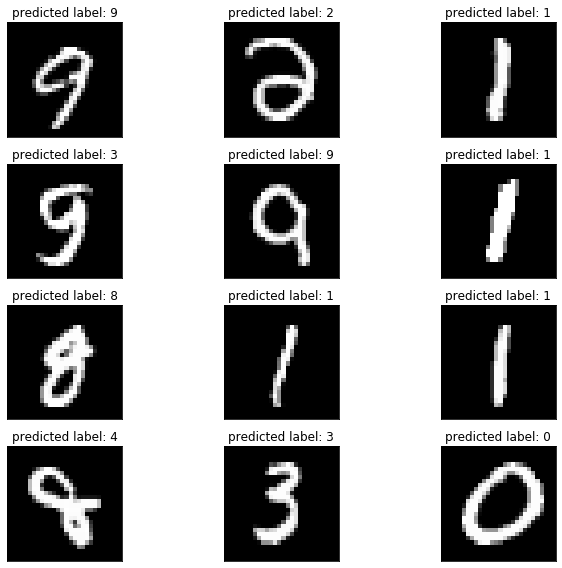

In [76]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#
vis_predictions(x_test, y_predict, len(y_predict))

### 2.1.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 2.2: Model [M2]: *fill-this-in* (25 points)




### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [190]:
#
#
# ------- Your Code -------
#
#

degree = np.asarray([1,2,3]) # example

# You don't need the following code, if you can use data from 2.1.1.

test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.2.2: Data Preprocessing


In [191]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.


### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [192]:
#
#
# ------- Your Code -------
#
# 

### 2.2.4: Fit Model


In [10]:
#
#
# ------- Your Code -------
#
# 
#  Please save the trained model

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


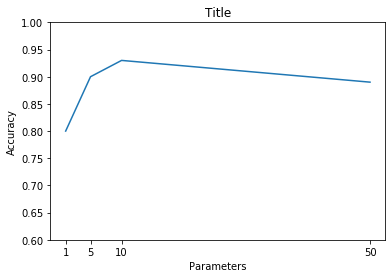

In [11]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

# Example: plot_scores(parameters, scores, "title", "x_label", "y_label"), 

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.

In [13]:
# Here report the score for the best model
#
# ------- Your Code -------
#

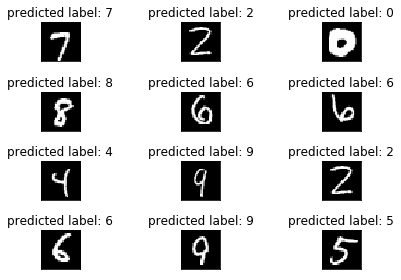

In [198]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#

### 2.2.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 2.3: Model [M3] (Neural Networks): *fill-this-in* (25 points)



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [78]:
#
#
# ------- Your Code -------
#
#
batch_size_train = 64 # Fill in
batch_size_test = 1000 # Fill in
n_epochs = 3 # Fill in
learning_rate = 0.01
momentum = 0.5
# other parameters ...


# You don't need the following code, if you can use data from 2.1.1.
# You can also use torch built-in functions (torch.utils.data)

test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.3.2: Data Preprocessing


In [126]:
print(training_data.train_data.size())
print(training_data.train_data.float().mean()/255)
print(training_data.train_data.float().std()/255)

C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])
tensor(0.1306)
tensor(0.3081)


In [143]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.

mean_train_data = training_data.train_data.float().mean()/255
std_train_data = training_data.train_data.float().std()/255

mean_test_data = test_data.test_data.float().mean()/255
std_test_data = test_data.test_data.float().std()/255

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data/mnist/', train=True, download=False,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize((mean_train_data, ), (std_train_data,))
                              ])), batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data/mnist/', train=False, download=False,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                              ])), batch_size=batch_size_test, shuffle=True)


C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [174]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

### 2.3.3: Model

Define your model here

In [199]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
        
#         # Max pooling over a (2, 2) window
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
#         # If the size is a square you can only specify a single number
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x = x.view(-1, self.num_flat_features(x))
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [190]:
from sklearn.datasets import make_classification
print("Hello World")
X, y = make_classification(1000, 20, n_informative=10, random_state=0)
X = X.astype(np.float32)
y = y.astype(np.int64)
print(X[0], y.shape)

Hello World
[-0.9658346  -2.1890705   0.16985609  0.8138456  -3.375209   -2.1430597
 -0.39585084  2.9419577  -2.1910605   1.2443967   0.04351204 -0.5150961
 -0.86073655 -1.1097169   0.31839254 -0.8231973  -1.056304   -0.89645284
  0.3759244  -1.0849651 ] (1000,)


In [236]:

print(x_trainval_3d.shape)
x_rr = x_trainval_3d.reshape(-1, 1, 28, 28).astype(np.double)
print(x_rr.shape)
x_tensor = torchvision.datasets.MNIST(dataset_dir,train=True, transform=torchvision.transforms.Compose([
    
torchvision.transforms.ToTensor()]), 
                                     target_transform=None, download=True)

print(x_rr[1])

(3000, 28, 28)
(3000, 1, 28, 28)
[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
   227. 253.

In [235]:
net = NeuralNetClassifier(
    Net,
    max_epochs=5,
    lr=0.1,
    train_split=None,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

net.fit(x_rr, y=y_trainval.astype(np.double))
y_proba = net.predict_proba(x_rr)

# params = {
#     'lr': [0.01, 0.02],
#     'max_epochs': [10, 20],
#     'module__num_units': [10, 20],
# }
# gs = sklearn.model_selection.GridSearchCV(net, params, refit=False, cv=3, scoring='accuracy')

# gs.fit(x_trainval_3d, y_trainval)
# print(gs.best_score_, gs.best_params_)


RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'weight'

### 2.2.4: Fit Model


In [145]:
#
#
# ------- Your Code -------
#
# Example: net = Net(), ....



net = Net()
print(net)
optimizer = optim.SGD(net.parameters(), lr= learning_rate,
                      momentum=momentum)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [146]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [147]:
def train(n_epochs):
    net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = net(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100. * batch_idx / len(train_loader), loss.item()))
            
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            
            torch.save(net.state_dict(), 'results/model.pth')
            torch.save(optimizer.state_dict(), 'results/optimizer.pth')
          

In [148]:
def test():
    net.eval()
    test_loss = 0 
    correct = 0 
    with torch.no_grad():
        for data, target in test_loader:
            output = net(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset), 
            100. * correct / len(test_loader.dataset)))

In [14]:
# Save your model using torch.save()

### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

In [150]:
# Here plot epoch (# passes over training data) and loss
#
# ------- Your Code -------
#
test()
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

C:\ProgramData\Miniconda3\envs\DSP\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.6787, Accuracy: 9412/10000 (94%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.429278
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.428637
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.376274
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.792859
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.377458
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.494210
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.415023
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.327026
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.270606
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.404101
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.473093
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.354470
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.260446
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.464224
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.412988
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.280217
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.387143
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.349430
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.361054
Train Epoch: 1 [12160

In [ ]:
# Here plot epoch and accuracy over val/test set
#
# ------- Your Code -------
#

In [144]:
#
#
# ------- Your Code -------
# Example:
# net = Net()
# net.load_state_dict(torch.load("PATH"))

<All keys matched successfully>

In [ ]:
# Here report the score for the best model
#
# ------- Your Code -------
#

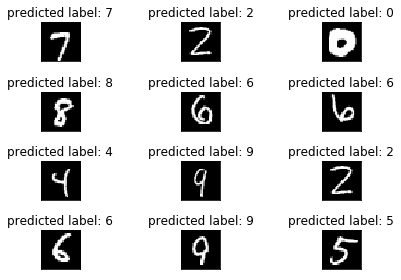

In [198]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#

### 2.3.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 3. Summary (20 points)

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.